In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
import joblib

In [3]:
# Importing dataset 
df = pd.read_csv("../dataset/heart_2020_cleaned.csv",low_memory=False)
# To show first 5 row
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# basic analysis of dataset
df.shape # (319795,18)  ---> shape of dataset
# To check a null value
df.isnull().sum() # ---> no null value

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# To check information of dype and column
df.info() 
# to count a mean,variance and standard deviation in whole dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
# To check counts of target heartdisease
df['HeartDisease'].value_counts() # ---> highly imbalance data 1:10 

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

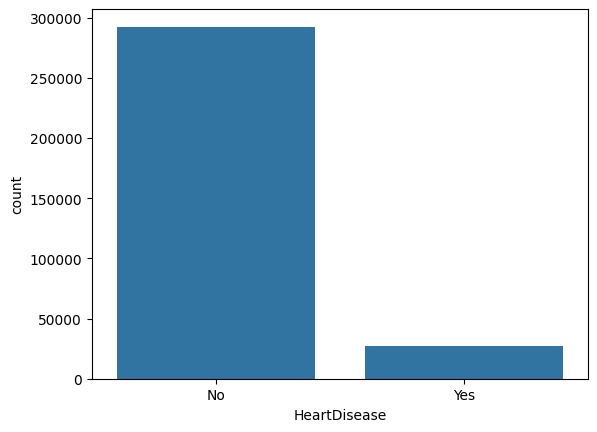

In [7]:
# visualize a target count
sns.countplot(data=df,x=df["HeartDisease"])
plt.show()  # ---> to solve the imbalance using SMOTE methods 


In [8]:
# To change the catogorical data type 1 : binary value yes == 1 ,no == 0 and male == 1,female == 0
list_NY_column = [
    'KidneyDisease','HeartDisease','Smoking','AlcoholDrinking',
    'Stroke','DiffWalking','PhysicalActivity','Asthma','SkinCancer'             
    ] 
for i in list_NY_column:
    df[i] = df[i].astype(str).str.strip()   # ---> change the  yes == 1 ,no == 0
    df[i] = df[i].map({'No': 0 , 'Yes': 1})
# To change the gender ---> male == 1,female == 0
df["Sex"] = df["Sex"].astype(str).str.strip()
df["Sex"] = df["Sex"].map({'Female': 0,'Male': 1})

In [9]:
# To converting a multi categorical data
multi_cat = {
    'Very good': 1,
    'Good': 2,
    'Fair': 3,
    'Poor': 4,
    'Excellent': 5
}
df['GenHealth'] = df['GenHealth'].astype(str).str.strip()
df['GenHealth'] = df['GenHealth'].map(multi_cat)
df['GenHealth'].unique()


array([1, 3, 2, 4, 5])

In [10]:
# range category data random initiated a value
age_range = {
    '18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37,
    '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57,
    '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77,
    '80 or older': 82
}
df["AgeCategory"] = df["AgeCategory"].astype(str).str.strip()
df['AgeCategory'] = df['AgeCategory'].map(age_range)


In [11]:
# To convert a nomial multiple value 
nomial_columnses = ['Diabetic','Race']
for col in nomial_columnses:
    df[col] = df[col].astype(str).str.strip()
df = pd.get_dummies(df,columns=nomial_columnses,drop_first=True,dtype=int)

In [12]:
# after encodeing categorical data
df.shape    

(319795, 24)

In [13]:
# after change the dtype of column
df.info() #---> change the dtype and add extra column using one-hot method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int64  
 1   BMI                               319795 non-null  float64
 2   Smoking                           319795 non-null  int64  
 3   AlcoholDrinking                   319795 non-null  int64  
 4   Stroke                            319795 non-null  int64  
 5   PhysicalHealth                    319795 non-null  float64
 6   MentalHealth                      319795 non-null  float64
 7   DiffWalking                       319795 non-null  int64  
 8   Sex                               319795 non-null  int64  
 9   AgeCategory                       319795 non-null  int64  
 10  PhysicalActivity                  319795 non-null  int64  
 11  GenHealth                         319795 non-null  i

In [14]:
df.corr()['HeartDisease'].sort_values(ascending=True)

PhysicalActivity                   -0.100030
Race_Hispanic                      -0.036163
AlcoholDrinking                    -0.032080
Race_Asian                         -0.030262
Diabetic_Yes (during pregnancy)    -0.013930
Race_Black                         -0.010156
Race_Other                         -0.003039
SleepTime                           0.008327
GenHealth                           0.011713
Diabetic_No, borderline diabetes    0.016182
MentalHealth                        0.028591
Race_White                          0.040121
Asthma                              0.041444
BMI                                 0.051803
Sex                                 0.070040
SkinCancer                          0.093317
Smoking                             0.107764
KidneyDisease                       0.145197
PhysicalHealth                      0.170721
Diabetic_Yes                        0.183072
Stroke                              0.196835
DiffWalking                         0.201258
AgeCategor

In [15]:
# split the feature and target value
x = df.drop(columns='HeartDisease',axis=0) # ---> feature value
y = df["HeartDisease"]  # ---> target value

In [16]:
# scale the value
scaler = StandardScaler()
num_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime','AgeCategory']
x[num_col] = scaler.fit_transform(x[num_col])

In [17]:
# feature first five col
x.shape

(319795, 23)

In [18]:
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')>

In [49]:
# applying SMOTE for reduce the imbalcen data
sme = SMOTETomek(random_state=42)
x_resample,y_resmaple=sme.fit_resample(x_train,y_train)

In [50]:
# before imbalancevalue count
print(y_train.value_counts())

HeartDisease
0    234055
1     21781
Name: count, dtype: int64


In [51]:
# after imbalance reduced value count
print(y_resmaple.value_counts())

HeartDisease
0    230269
1    230269
Name: count, dtype: int64


In [52]:
# To initiated a model training process logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [53]:
# initiated a model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


In [54]:
# resample data will fitting a model
model.fit(x_resample, y_resmaple)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
# prediction a value use x test sample data
y_pred_rf = model.predict(x_test)

print(" Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

 Random Forest Results
Accuracy: 0.8732000187620195
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     58367
           1       0.28      0.29      0.28      5592

    accuracy                           0.87     63959
   macro avg       0.61      0.61      0.61     63959
weighted avg       0.87      0.87      0.87     63959



In [ ]:
# expert a model using joblib into pkl file
joblib.dump(model,"heart_disease_model.pkl")
print("model successfully saved")

model successfully saved


In [ ]:
# if user input does not match the input using this model for column 
joblib.dump(list(x_train.columns), "../model/train_columns.pkl")


['../model/train_columns.pkl']